In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("/Users/bhanukedhar/Documents/ML/datasets/housing.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
x = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean_proximity"]
X = df[x].values
y = df["median_house_value"].values

In [26]:
# creatting dummy variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ct = ColumnTransformer([("encoder", OneHotEncoder(), [8])], remainder = "passthrough")

In [27]:
X = ct.fit_transform(X)

In [28]:
X[:2]

array([[0.0, 0.0, 0.0, 1.0, 0.0, -122.23, 37.88, 41.0, 880.0, 129.0,
        322.0, 126.0, 8.3252],
       [0.0, 0.0, 0.0, 1.0, 0.0, -122.22, 37.86, 21.0, 7099.0, 1106.0,
        2401.0, 1138.0, 8.3014]], dtype=object)

In [29]:
df[df.isna().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

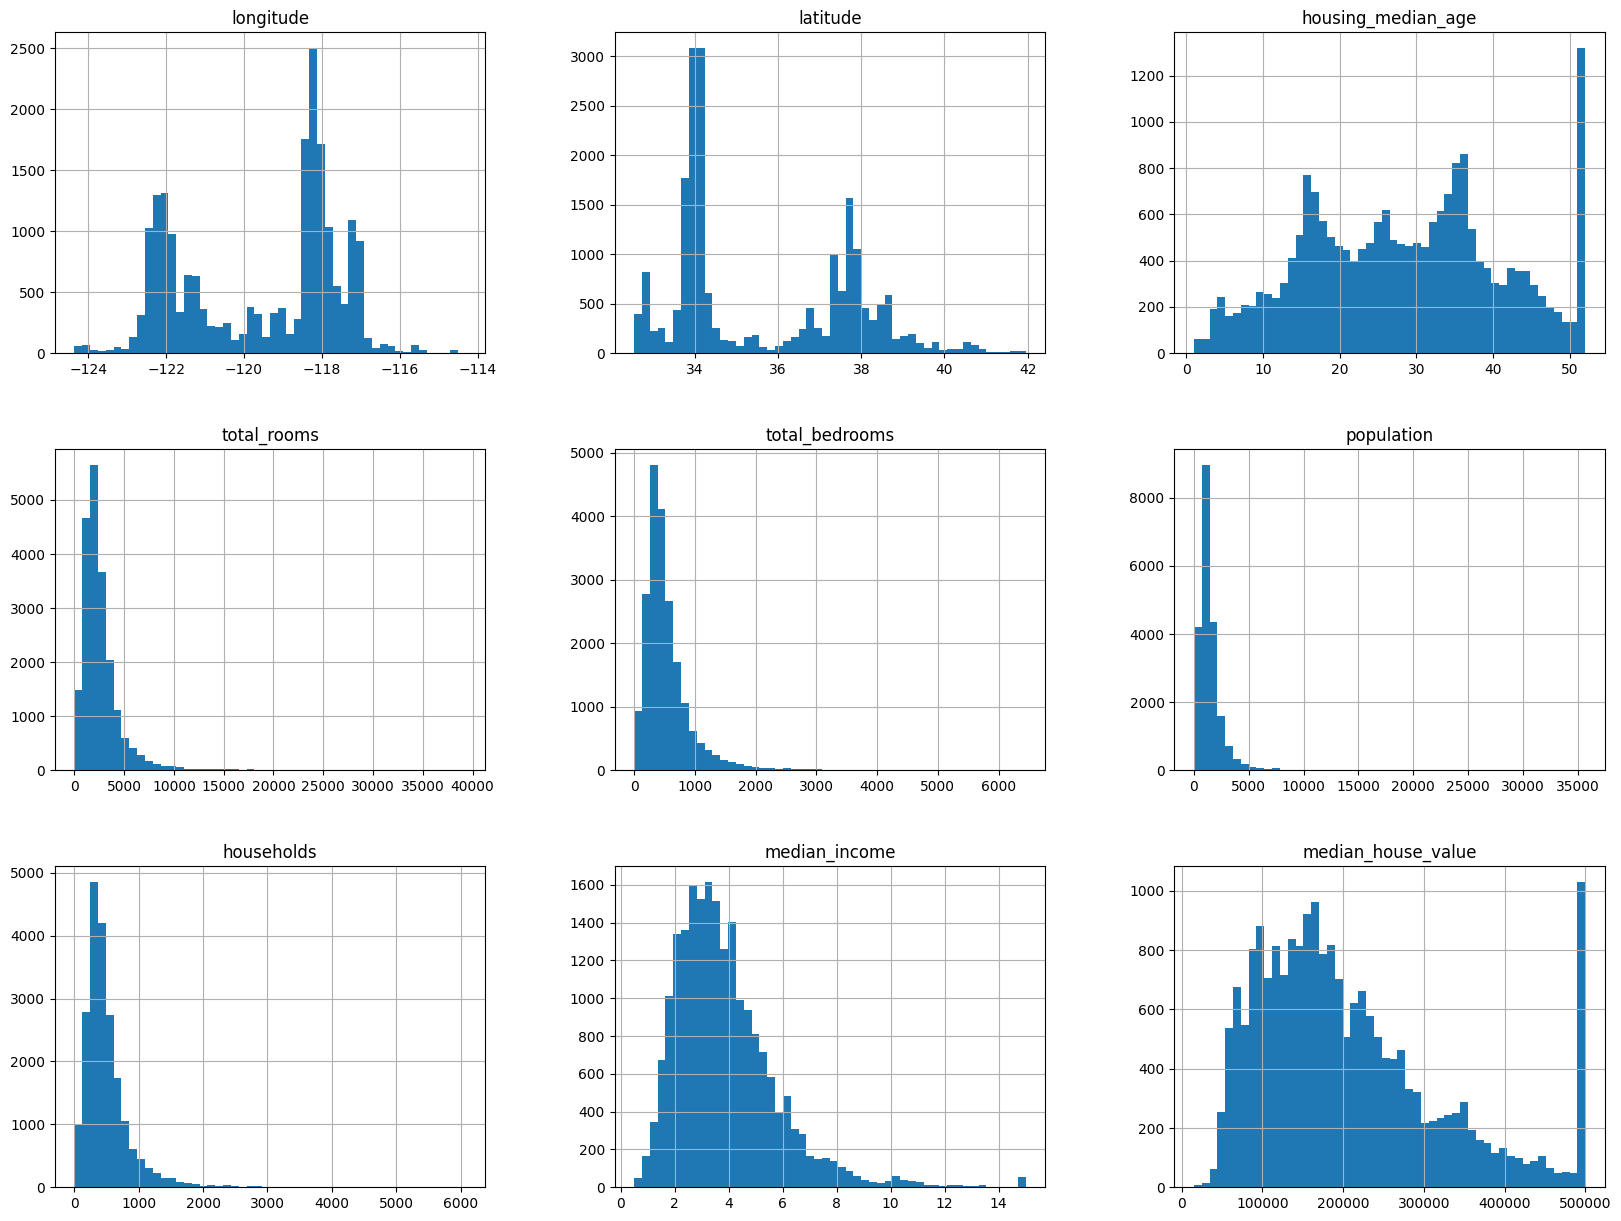

In [30]:
df.hist(bins = 50, figsize = (20,15))

(array([   5.,    4.,    5.,    9.,   13.,   48.,   90.,  165.,  274.,
         264.,  323.,  353.,  258.,  288.,  406.,  397.,  482.,  399.,
         337.,  369.,  453.,  359.,  360.,  355.,  351.,  485.,  428.,
         387.,  419.,  502.,  563.,  397.,  442.,  344.,  407.,  410.,
         403.,  300.,  252.,  253.,  303.,  317.,  303.,  358.,  310.,
         268.,  272.,  236.,  227.,  210.,  200.,  234.,  223.,  240.,
         173.,  158.,  167.,  153.,  112.,  104.,   99.,  125.,  105.,
         127.,  111.,  134.,  118.,  134.,  107.,  179.,   91.,  102.,
          94.,   66.,   82.,   67.,   65.,   52.,   69.,   64.,   48.,
          56.,   47.,   52.,   41.,   39.,   50.,   40.,   44.,   62.,
          33.,   33.,   22.,   27.,   29.,   22.,   30.,   17.,   19.,
        1011.]),
 array([ 14999.  ,  19849.02,  24699.04,  29549.06,  34399.08,  39249.1 ,
         44099.12,  48949.14,  53799.16,  58649.18,  63499.2 ,  68349.22,
         73199.24,  78049.26,  82899.28,  87749.3 ,  9

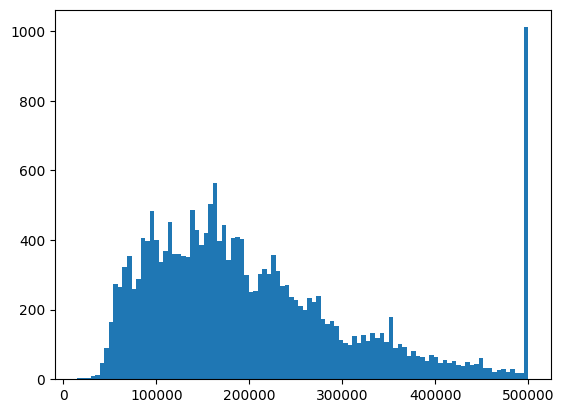

In [31]:
plt.hist(df["median_house_value"], bins = 100)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

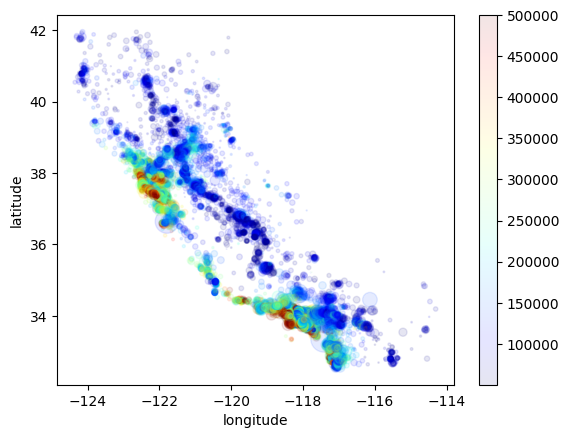

In [32]:
d.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, s = d["population"]/100, c=d["median_house_value"], cmap= "jet")

In [33]:
#trying to understand at which location does most houses are that are greater than 500k
from collections import Counter
d = df[df["median_house_value"] > 50000]
g = d.groupby(["longitude",	"latitude"]).size().reset_index()
g = pd.DataFrame(g)
g[g[0] == g[0].max()]

,longitude,latitude,0
928,-122.41,37.8,15


In [34]:
d["median_house_value"].unique

<bound method Series.unique of 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20430, dtype: float64>

In [35]:
#finding the correlation
correlation_table = df.corr()
correlation_table["median_house_value"]


/var/folders/cd/60bgrl6d57gcpppm6fn4m4780000gn/T/ipykernel_99889/2844817815.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr()


longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Dealing with the null values


In [36]:
# replacing the np.nan values with mean 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [37]:
X = imputer.fit_transform(X)

In [54]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [42]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,0.0,1.0,0.0,0.0,0.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,0.0,1.0,0.0,0.0,0.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,0.0,1.0,0.0,0.0,0.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [45]:
#checking which of the category has the least occurence so that we can drop one of it
Counter(df["ocean_proximity"])

Counter({'NEAR BAY': 2290,
         '<1H OCEAN': 9136,
         'INLAND': 6551,
         'NEAR OCEAN': 2658,
         'ISLAND': 5})

In [48]:
#i decided to drop the Island because it has only 5 entries 
# enc = ct.named_transformers_['encoder']
# enc.get_feature_names_out(input_features=['category'])

array(['category_<1H OCEAN', 'category_INLAND', 'category_ISLAND',
       'category_NEAR BAY', 'category_NEAR OCEAN'], dtype=object)

In [58]:
c = np.sum(X,axis =0)

In [63]:

np.set_printoptions(precision =2, suppress = True) 
c

array([    9136.  ,     6551.  ,        5.  ,     2290.  ,     2658.  ,
       -2467918.7 ,   735441.62,   591119.  , 54402150.  , 11101648.2 ,
       29421840.  , 10310499.  ,    79890.65])

In [64]:
#i decided to remove the least occurance of 
X = np.delete(X, 2, axis =1)

In [66]:
X[0]

array([   0.  ,    0.  ,    1.  ,    0.  , -122.23,   37.88,   41.  ,
        880.  ,  129.  ,  322.  ,  126.  ,    8.33])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train[0]


array([   0.  ,    1.  ,    0.  ,    0.  , -117.55,   33.83,    6.  ,
        502.  ,   76.  ,  228.  ,   65.  ,    4.24])

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
print(lr.coef_)
print()
print(lr.intercept_)

[-161713.75 -200317.73 -166029.63 -156151.88  -26872.99  -25522.26
    1072.74      -4.29      67.58     -38.68      78.05   38755.79]

-2112653.772550062


In [73]:
y_pred = lr.predict(X_test)

In [75]:
y_test, y_pred

(array([136900., 241300., 200700., ..., 128600., 259500., 167600.]),
 array([216580.43, 287452.11, 179457.58, ...,  89138.64, 255304.51,
        213286.4 ]))

In [76]:
((y_test.reshape(len(y_test), 1) - y_pred.reshape(len(y_pred), 1)) ** 2).mean()

4718206968.301608

In [77]:
new_df = pd.DataFrame({"test" : y_test, "pred" : y_pred})

In [80]:
new_df["diff"] = new_df["test"] - new_df["pred"]
new_df.reset_index(inplace = True)
new_df

,index,test,pred,diff
0,0,136900.0,216580.434451,-79680.434451
1,1,241300.0,287452.107836,-46152.107836
2,2,200700.0,179457.580646,21242.419354
3,3,72500.0,86485.418340,-13985.418340
4,4,460000.0,291756.937449,168243.062551
...,...,...,...,...
4123,4123,169500.0,171472.200850,-1972.200850
4124,4124,204600.0,245342.253196,-40742.253196
4125,4125,128600.0,89138.639666,39461.360334
4126,4126,259500.0,255304.511298,4195.488702


<BarContainer object of 50 artists>

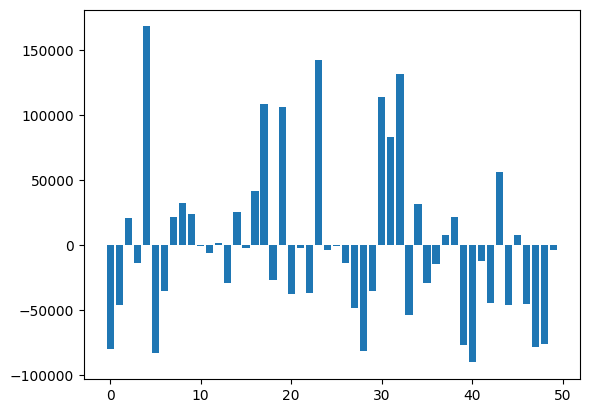

In [81]:
import matplotlib.pyplot as plt
plt.bar("index", "diff", data=new_df[:50])

/var/folders/cd/60bgrl6d57gcpppm6fn4m4780000gn/T/ipykernel_99889/1681992847.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

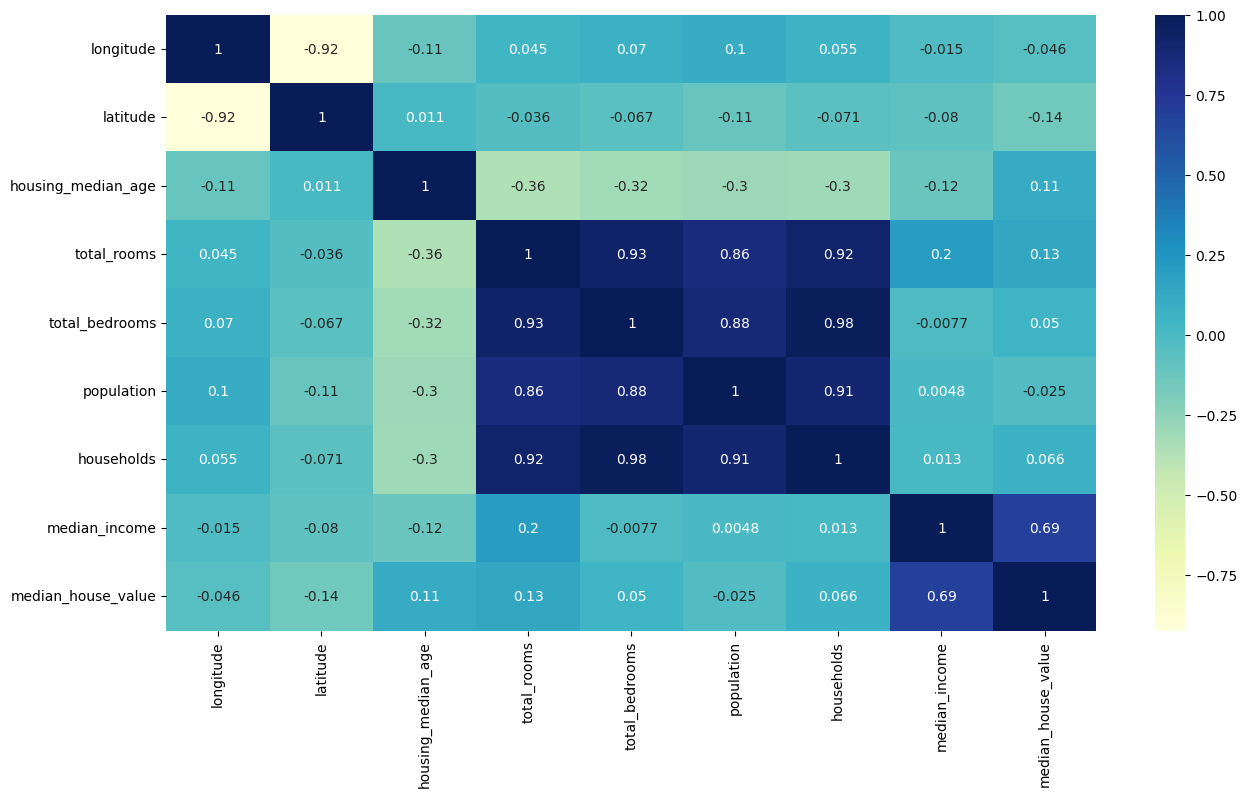

In [84]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [98]:
# plt.scatter()
df.columns
# df.drop("level_0", axis =1, inplace = True)
df


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
